<a href="https://colab.research.google.com/github/StructuralIntegrity/Beams/blob/master/BS7910_IBeam_semi_ellip_defcet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BS7910:2013 - Engineering Critical Assessment
## I-beam with weld centre solidification cracking Semi-Elliptical defect

---



***This code determines the critical crack length***

### Assumptions:
* No misalignment due to the setup and symmetric welding process (double T-butt weld)
* Finite element stresses from model of actual weld geomentry account for the stress concentrration effect and are input into the model
* Material mismatch in parent and weld are insignificant to the fracture failure mode and plastic collapse mode due to the location of the defect in the weld centre
* ***No subcritical crack growth*** by environmental factors or embrittlement such as intergranular corrosion attack, hydrogen embrittlement, or embrittlement in a hydrogen sulfide envrionment, stress-corrossion cracking etc.



## Dependencies

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Stress Intensity Factor - Semi-Elliptical Surface Defect in Plate

In [0]:
def SIF_semi_ell_plate(a, c, B, W, Pm, Pb, primary=True): 
  #SIF for semielliptical surface defect in a finite plate BS7910 M.4.1.1-3 returns SIF for point
  # at the deepest part of the semi-elliptical crack [KA] (semiminor axis) and edge of the
  # crack [KB] (semi-major axis)
  
  ## code works for varying a or varying c, input a vector and scalar (either a or c)
  ## under secondary load then: primary=False
  
  M=1
  fw=np.sqrt(1/(np.cos(((np.pi*c)/W)*(a/B)**0.5)))

 
  #--------------------------------------------------
  #For the deepest point of crack: A
  ## MEMBRANE
  g=1.0
  
  if np.isscalar(a):
    ftheta=np.piecewise(c,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[1, lambda c: np.sqrt(c/a)])
    
  elif np.isscalar(c):
    ftheta=np.piecewise(a,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[1, lambda a: np.sqrt(c/a)])
    
  else:
    print("Both a and c do not vary, check code")

    
  if np.isscalar(a):
    THETA=np.piecewise(c,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda c: np.sqrt(1+1.464*(a/c)**1.65), lambda c: np.sqrt(1+1.464*(c/a)**1.65)])
    
    M1=np.piecewise(c,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda c: 1.13-0.09*(a/c), lambda c: np.sqrt(c/a)*(1+0.04*(c/a))])
    
    M2=np.piecewise(c,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda c: (0.89/(0.2+(a/c)))-0.54, lambda c: 0.2*(c/a)**4])
    
    M3=np.piecewise(c,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda c: 0.5-1/(0.65+a/c)+14*(1-a/c)**24, lambda c: -0.11*(c/a)**4])
        
  elif np.isscalar(c):
    THETA=np.piecewise(a,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda a: np.sqrt(1+1.464*(a/c)**1.65), lambda a: np.sqrt(1+1.464*(c/a)**1.65)])
    
    M1=np.piecewise(a,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda a: 1.13-0.09*(a/c), lambda a: np.sqrt(c/a)*(1+0.04*(c/a))])
    
    M2=np.piecewise(a,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda a: (0.89/(0.2+(a/c)))-0.54, lambda a: 0.2*(c/a)**4])
    
    M3=np.piecewise(a,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda a: 0.5-1/(0.65+a/c)+14*(1-a/c)**24, lambda a: -0.11*(c/a)**4])
    
  else:
    print("Both a and c do not vary, check code")
  
  Mm_A=(M1+M2*(a/B)**2+M3*(a/B)**4)*(g*ftheta)/THETA
  
  ## BENDING
  
  if np.isscalar(a):
    q=np.piecewise(c,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda c: 0.2+(a/c)+0.6*(a/B), lambda c: 0.2 + (c/a)+0.6*(a/B)])
    
    G1=np.piecewise(c,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda c: -1.22-0.12*(a/c), lambda c: -2.11+0.77*(c/a)])
    G2=np.piecewise(c,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda c: 0.55-1.05*(a/c)**0.75+0.47*(a/c)**1.5, lambda c: 0.55-0.72*(c/a)**0.75+0.14*(c/a)**1.5])
    
    H2=1+G1*(a/B)+G2*(a/B)**2
    
  elif np.isscalar(c):
    q=np.piecewise(a,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda a: 0.2+(a/c)+0.6*(a/B), lambda a: 0.2 + (c/a)+0.6*(a/B)])
    
    G1=np.piecewise(a,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda a: -1.22-0.12*(a/c), lambda a: -2.11+0.77*(c/a)])
    G2=np.piecewise(a,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda a: 0.55-1.05*(a/c)**0.75+0.47*(a/c)**1.5, lambda a: 0.55-0.72*(c/a)**0.75+0.14*(c/a)**1.5])
    
    H2=1+G1*(a/B)+G2*(a/B)**2
    
  else:
    print("Both a and c do not vary, check code")
  
  H=H2
  Mb_A = H*Mm_A
  
  if primary:
    YSig = fw*(Mm_A*Pm+Mb_A*Pb)
  else:
    YSig = Mm_A*Pm+Mb_A*Pb
  
  KA = YSig*np.sqrt(np.pi*a)
  
  
  #-----------------------------------------------------------#

  #For the ends of the crack: B
  #MEMBRANE
  if np.isscalar(a):
    g=np.piecewise(c,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[1.1 + 0.35*(a/B)**2, lambda c: 1.1 + 0.35*(c/a)*(a/B)**2])
    ftheta=np.piecewise(c,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda c: np.sqrt(a/c), 1])
  
  elif np.isscalar(c):
    g=np.piecewise(a,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[1.1 + 0.35*(a/B)**2, lambda a: 1.1 + 0.35*(c/a)*(a/B)**2])
    ftheta=np.piecewise(a,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda a: np.sqrt(a/c), 1])
    
  else:
    print("Both a and c do not vary, check code")
    
  if np.isscalar(a):
    THETA=np.piecewise(c,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda c: np.sqrt(1+1.464*(a/c)**1.65), lambda c: np.sqrt(1+1.464*(c/a)**1.65)])
    
    M1=np.piecewise(c,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda c: 1.13-0.09*(a/c), lambda c: np.sqrt(c/a)*(1+0.04*(c/a))])
    
    M2=np.piecewise(c,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda c: (0.89/(0.2+(a/c)))-0.54, lambda c: 0.2*(c/a)**4])
    
    M3=np.piecewise(c,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda c: 0.5-1/(0.65+a/c)+14*(1-a/c)**24, lambda c: -0.11*(c/a)**4])
        
  elif np.isscalar(c):
    THETA=np.piecewise(a,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda a: np.sqrt(1+1.464*(a/c)**1.65), lambda a: np.sqrt(1+1.464*(c/a)**1.65)])
    
    M1=np.piecewise(a,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda a: 1.13-0.09*(a/c), lambda a: np.sqrt(c/a)*(1+0.04*(c/a))])
    
    M2=np.piecewise(a,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda a: (0.89/(0.2+(a/c)))-0.54, lambda a: 0.2*(c/a)**4])
    
    M3=np.piecewise(a,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda a: 0.5-1/(0.65+a/c)+14*(1-a/c)**24, lambda a: -0.11*(c/a)**4])
    
  else:
    print("Both a and c do not vary, check code")
  
  
  Mm_B=(M1+M2*(a/B)**2+M3*(a/B)**4)*(g*ftheta)/THETA
  
  ## BENDING
  
  if np.isscalar(a):
        
    H1=np.piecewise(c,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda c: 1-0.34*(a/B)-0.11*(a/c)*(a/B), lambda c: 1-(0.04+0.41*(c/a))*(a/B)+(0.55-1.93*(c/a)**0.75+1.38*(c/a)**1.5)*(a/B)**2])
           
  elif np.isscalar(c):
        
    H1=np.piecewise(a,[a/(2*c) <= 0.5, a/(2*c) > 0.5],[lambda a: 1-0.34*(a/B)-0.11*(a/c)*(a/B), lambda a: 1-(0.04+0.41*(c/a))*(a/B)+(0.55-1.93*(c/a)**0.75+1.38*(c/a)**1.5)*(a/B)**2])
           
  else:
    print("Both a and c do not vary, check code")
  
  H=H1
  Mb_B = H*Mm_B
  
  if primary:
    YSig = fw*(Mm_B*Pm+Mb_B*Pb)
  else:
    YSig = Mm_B*Pm+Mb_B*Pb
  
  KB = YSig*np.sqrt(np.pi*a)
  
  return KA, KB

![Defect Geometry](https://drive.google.com/uc?id=1d70WH5UCBkl29t0dkwkIZ2fo2mXZBkRo =600x)

## Limit Load Solution - Semi-elliptical surface flaws in plates under combined tension and bending

In [0]:
def refStress_semiellsurfplate(a, c, B, W, Pm, Pb, pinned=False):
  #BS7910:2013 EQ P.6.1
  if np.isscalar(a):
    alpha_dp=np.piecewise(c,[(2*(c+B)) <= W, (2*(c+B)) > W],[lambda c: (a/B)/(1+(B/c)), lambda c: (a/B)*((2*c)/W)])
  
  elif np.isscalar(c):
    alpha_dp=np.piecewise(a,[(2*(c+B)) <= W, (2*(c+B)) > W],[lambda a: (a/B)/(1+(B/c)), lambda a: (a/B)*((2*c)/W)])
    
  else:
    print("Both a and c do not vary, check code")

  if not pinned:
      refStress=(Pb + np.sqrt(Pb**2 + 9 * Pm**2 * (1 - alpha_dp)**2))/(3 * (1 - alpha_dp)**2)
  else:
      refStress=(Pb + 3 * Pm * alpha_dp + np.sqrt((Pb + 3 * Pm * alpha_dp)**2 + 9 * Pm**2 * (1 - alpha_dp)**2))/(3 * (1 - alpha_dp)**2)
  return refStress
    

## Defect Characterisation

In [4]:
B = np.cos(np.radians(45))*6e-3 #m

W = 5.0 #m

a = 3e-3 #m

c = np.linspace(a, 15*a, 20 ) #m

print('a=', a*1000, 'c=', c*1000, 'B=', B*1000, 'W=', W*1000, '[mm]')

a= 3.0 c= [ 3.          5.21052632  7.42105263  9.63157895 11.84210526 14.05263158
 16.26315789 18.47368421 20.68421053 22.89473684 25.10526316 27.31578947
 29.52631579 31.73684211 33.94736842 36.15789474 38.36842105 40.57894737
 42.78947368 45.        ] B= 4.242640687119286 W= 5000.0 [mm]


## Material Parameters

The following guide is given for sensitivity of mechanical properties for ferritic steels in BS7910
![alt text](https://drive.google.com/uc?id=1qEeHmRsnnnhAoXqivfLn12LtYOsLoRet =500x)

### Tensile Properties

In [0]:
E = 206000 #MPa (from BS7910 p36)
v = 0.3    # Poissson's ratio

#Weld
#-----------------
YS_weld = 460 #MPa 
UTS_weld = 560 #MPa


#Parent
#-----------------
YS_parent = 380 #MPa Assume Yeld Plateu with discontinuous yielding see BS7910 Table 4
URS_parent = 400 #MPa

### Fracture Toughness of Weld

In [6]:
#BS7910 Appendix J - Use of Weld Metal Charpy impact tests

Cv = 84 #J   this the minimum value from test cert AUM1215S6

Kmat_02 = np.sqrt((E*(0.53*Cv**1.28)*(0.2**(0.133*Cv**0.256)))/(1000*(1-v**2))) #BS7910 Eq. J.6

Kmat = Kmat_02 #MPa.m^1/2

print('Kmat=',Kmat)

Kmat= 133.83827499957397


## Primary Stress
This will be stress linearisation from Finite Elelement Model Analysis for various load cases

In [0]:
Pm = 1 #MPa
Pb = 0 #MPa

## Secondary Stresses
Only *weld transverse residual stress (RS)* is considered operable

There is assumed to be:
* no thermal stress
* no stress from Eigen strains resulting from flattening post-process or from bending I-beam into an arch etc (plasticity variations in body)

 ### The following applies to the RS as per BS7910:
|      |
| ----- |
| ![alt text](https://drive.google.com/uc?id=1LHMjg1xfGape1W5VHLlnbJEJn4wFkI4g =600x)  |


In [0]:
Qm = YS_parent #MPa
Qb = 0.0 #MPa

## FAD Option 1
* Material exhibiting discontinuous yielding

In [0]:
def FAD_1(E,YS,UTS,de,discon_yield = True):
  # OPTION 1 FAD from BS7910
  # NB: set de=0.0 for continuous yielding, YS is lower yield strength
  
  Lr_max=(YS+UTS)/(2*YS) # calc the cut off Lr
  
  FAD_Lr = np.linspace(0, Lr_max+0.1, 100 ) # generate Lr values for graphing
  
  mu = min(0.001*(E/YS),0.6)
  N = 0.3*(1-YS/UTS)
  
  gamma = 1+(E*de)/YS
  
  if discon_yield:
    FAD_Kr=np.piecewise(FAD_Lr,
                        [FAD_Lr < 1,
                         FAD_Lr == 1,
                         FAD_Lr > 1,
                         FAD_Lr > Lr_max],
                        [lambda FAD_Lr: (1+1/2*FAD_Lr**2)**(-1/2),
                         (gamma+1/(2*gamma))**(-1/2),
                         lambda FAD_Lr: (gamma+1/(2*gamma))**(-1/2)*FAD_Lr**((N-1)/(2*N)),
                         0.0 ])
  else:
    FAD_Kr=np.piecewise(FAD_Lr,
                        [FAD_Lr <= 1,
                         FAD_Lr > 1,
                         FAD_Lr > Lr_max],
                        [lambda FAD_Lr: (1+1/2*FAD_Lr**2)**(-1/2)*(0.3+0.7*np.exp(-mu*FAD_Lr**6)),
                         (1+1/2*1.0**2)**(-1/2)*(0.3+0.7*np.exp(-mu*1.0**6))*FAD_Lr**((N-1)/(2*N)),
                         0.0 ])
  return FAD_Lr, FAD_Kr
  

## Evaluation of Plasticity Interaction Effects -BS7910 Appendix R

In [0]:


def plasticity_interaction(K_p, K_s, Lr):
  # NB: Valid for K_s/(K_p/Lr)<=4 ONLY
  V1= 1+0.2*Lr+0.02*K_s*(Lr/K_p)*(1+2*Lr)
  V2=np.piecewise(Lr, [Lr < 1.05, Lr >=1.05], [lambda Lr: (3.1-2*Lr),1])
  V = np.minimum(V1,V2)
  return V

def K_js(E,v,a,K_s,YS, planestrain=True):
  #see BS7910 R3.3 to estimate Kj_s
  if planestrain:
    E=E/(1-v**2)
    beta = 3
  else:
    E=E
    beta =1

  a_eff= a+(1/(2*np.pi*beta))*(K_s/YS)**2
  K_js=np.sqrt(a_eff/a)*K_s
  # NB: may be non-conservative for significant stresses parallel to the flaw location
  # i.e. longitudinal RS and significant beam bend stresses
  return K_js

## Problem Definition

In [11]:
# Calculate the reference stress
refStress = refStress_semiellsurfplate(a, c, B, W, Pm, Pb, pinned=False)

# Determine Lr for plastic collapse
Lr=refStress/YS_weld

# Calculate the stress intensity at crack depth position A and crack ends position B
  # Primary
[KA_p, KB_p]=SIF_semi_ell_plate(a, c, B, W, Pm, Pb, primary=True)

  #Secondary
[KA_s, KB_s]=SIF_semi_ell_plate(a, c, B, W, Qm, Qb, primary=False)

K_p = np.maximum(KA_p,KB_p)
K_s = np.maximum(KA_s,KB_s)
 
# Calculate plastic intereaction parameter V  
V  = plasticity_interaction(K_p, K_s, Lr)

# Calculate Kr adjusted for plasticity interaction
Kr = (K_p+V*K_s)/Kmat

results=pd.DataFrame({'a':a,'c':c,'refStress':refStress,'K_p':K_p,'K_s':K_s,'V':V,'Lr':Lr,'Kr':Kr})
results

,K_p,K_s,Kr,Lr,V,a,c,refStress
0,0.087869,33.390138,0.256156,0.003074,1.024124,0.003,0.003000,1.414214
1,0.100347,38.131844,0.293631,0.003562,1.027979,0.003,0.005211,1.638680
2,0.121958,46.343690,0.357933,0.003952,1.031062,0.003,0.007421,1.817846
3,0.138128,52.488308,0.406379,0.004270,1.033582,0.003,0.009632,1.964167
4,0.151078,57.409087,0.445378,0.004535,1.035682,0.003,0.011842,2.085918
5,0.162167,61.622472,0.478883,0.004758,1.037458,0.003,0.014053,2.188806
6,0.172259,65.457037,0.509427,0.004950,1.038980,0.003,0.016263,2.276902
7,0.181863,69.106238,0.538508,0.005116,1.040299,0.003,0.018474,2.353180
8,0.191246,72.671164,0.566914,0.005261,1.041452,0.003,0.020684,2.419870
9,0.200523,76.195976,0.594990,0.005388,1.042469,0.003,0.022895,2.478672


###Check for plasticity interaction effects

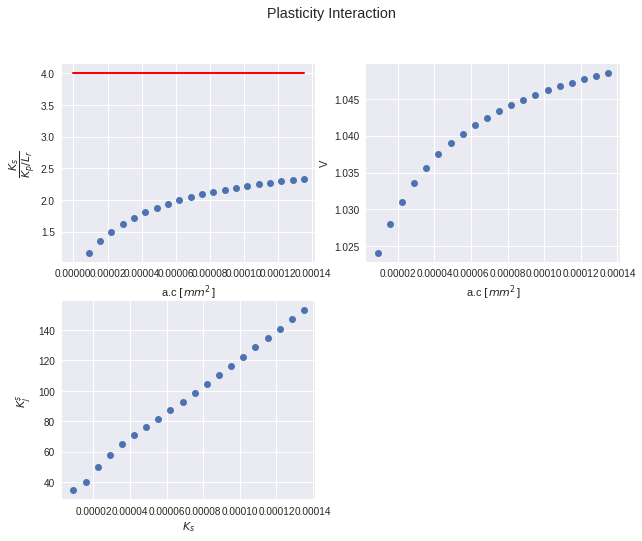

In [12]:
Interaction_ratio=K_s/(K_p/Lr)
plt.figure(figsize=(10, 8))
# plot interaction ratio
plt.subplot(2,2,1)
plt.plot(a*c, Interaction_ratio,'o', label='K_s/(K_p/Lr)')
plt.plot([0, max(a*c)], [4, 4], color='r', linestyle='-', linewidth=2)
plt.xlabel('a.c $[mm^2]$')
plt.ylabel(r'$\dfrac{K_s}{K_p/L_r}$')
#plt.xlim(0,1.5)
#plt.ylim(0,8)

# plot plasticity correction multiplier V
V=plasticity_interaction(K_p, K_s, Lr)
plt.subplot (2,2,2)
plt.plot(a*c,V,'o')
plt.xlabel('a.c $[mm^2]$')
plt.ylabel('V')

#plot estimated K_sj
K_js=K_js(E,v,a,K_s,YS_weld, planestrain=True)
plt.subplot(2,2,3)
plt.plot(a*c,K_js,'o')
plt.xlabel('$K_s$')
plt.ylabel('$K_j^{s}$')

plt.suptitle('Plasticity Interaction')
plt.show()


##Assessment

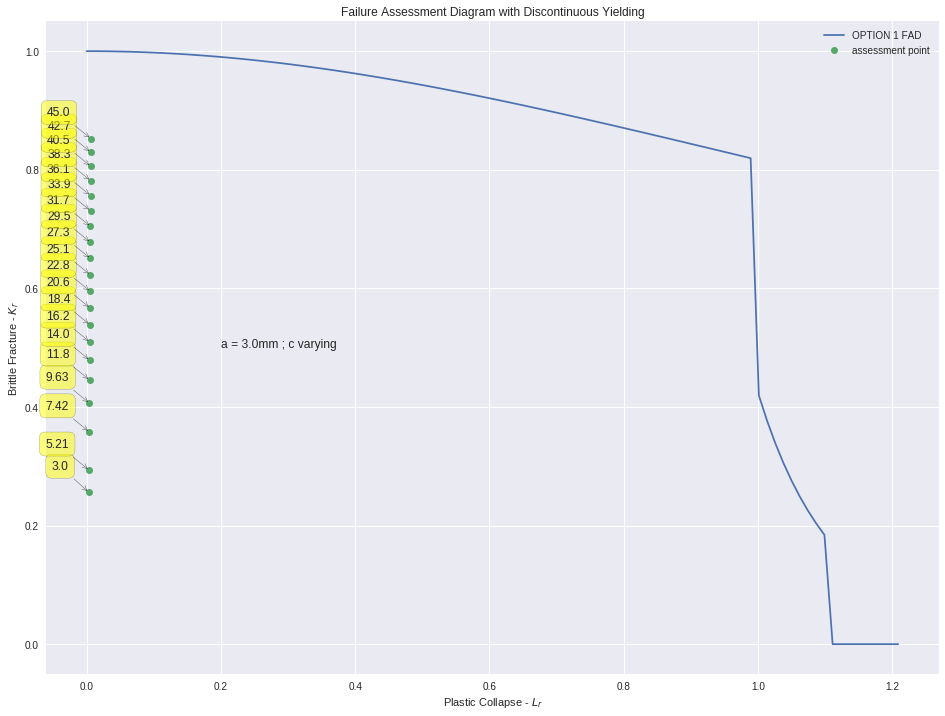

In [14]:
[FAD_Lr, FAD_Kr] =FAD_1(E,YS_weld,UTS_weld,de=0.01, discon_yield=True)
#print(FAD_Lr, FAD_Kr)
plt.figure(figsize=(16, 12))
plt.plot(FAD_Lr, FAD_Kr, label='OPTION 1 FAD')

plt.plot(Lr, Kr, 'o', label='assessment point')
plt.xlabel('Plastic Collapse - $L_r$')
plt.ylabel('Brittle Fracture - $K_r$')

plt.title('Failure Assessment Diagram with Discontinuous Yielding')

if np.isscalar(a):
  a_an=c*1000
  plt.text(0.2,0.5,'a = ' + str(a*1000)+'mm ; c varying')
else:
  a_an=a*1000
  plt.text(0.2,0.5,'c = ' + str(c*1000)+'mm ; a varying')
for i, x,y in zip(a_an,Lr, Kr):                                       
    plt.annotate('%.4s' %i, xy=(x,y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')) 
plt.legend()
# for the minor ticks, use no labels; default NullFormatter

plt.show()